In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance

In [4]:
# Load the data
url = "https://raw.githubusercontent.com/MitaliP001/patient-treatment-classification/main/training_set.csv"
data = pd.read_csv(url)

In [6]:
# Select the columns to use as features (independent variables)
X = data[['HAEMATOCRIT', 'HAEMOGLOBINS', 'ERYTHROCYTE', 'LEUCOCYTE', 'THROMBOCYTE', 'MCH', 'MCHC']]
# Select the target variable
y = data['SOURCE']


In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
# Train a KNN Regression model
model = KNeighborsRegressor(n_neighbors=5)
model.fit(X_train, y_train)


KNeighborsRegressor()

In [9]:
# Calculate feature importances using permutation importance
results = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=0)


In [10]:
# Get feature importances
feature_importances = results.importances_mean


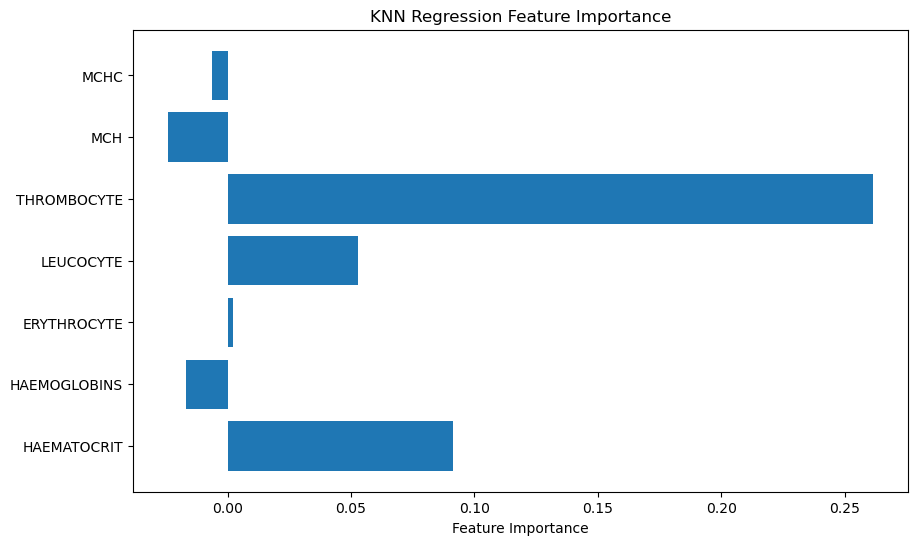

In [11]:
# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(X.columns, feature_importances)
plt.xlabel('Feature Importance')
plt.title('KNN Regression Feature Importance')
plt.show()